# Case Ofertas Relâmpago
## Análise Exploratória (EDA)

Contexto:
Arquivo chamado "relampago_relampago.csv" que contém informações sobre os resultados de ofertas do tipo relâmpago para um período de tempo e um país específico.

Essas ofertas no mercadolibre podem ser vistas da seguinte forma:

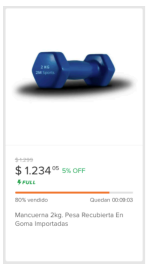

Ou seja, são ofertas que têm duração definida de algumas horas e um percentual de
unidades (estoque) comprometidas.

O objetivo deste desafio é fazer uma EDA sobre estes dados procurando insights
sobre este tipo de ofertas.


### Configuração do ambiente

In [319]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

In [320]:
# layout dos graficos e paleta de cores

CORES_GRAFICOS = [
    "#3483FA", # Azul
    "#333333", # Preto/Cinza
    "#00A650", # Verde
    "#F04449", # Vermelho
    "#FFB759", # Amarelo
    "#999999"  # Cinza Claro
]

minha_paleta = CORES_GRAFICOS 
pio.templates["eda_oferta"] = pio.templates["plotly_white"]
pio.templates["eda_oferta"].layout.colorway = minha_paleta
pio.templates.default = "eda_oferta"

### Importando os dados necessários

In [321]:
# Carregando o dataset
df = pd.read_csv(filepath_or_buffer="../datasets/ofertas_relampago.csv")

# Visualização do dataset
df.head(n=10)

OFFER_START_DATE           OFFER_START_DTTM          OFFER_FINISH_DTTM  \
0       2021-06-22  2021-06-22 16:00:00+00:00  2021-06-22 23:02:43+00:00   
1       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 19:00:02+00:00   
2       2021-06-22  2021-06-22 07:00:00+00:00  2021-06-22 13:00:01+00:00   
3       2021-06-22  2021-06-22 19:00:00+00:00  2021-06-23 01:36:12+00:00   
4       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 15:48:12+00:00   
5       2021-06-22  2021-06-22 18:00:00+00:00  2021-06-23 01:00:12+00:00   
6       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 19:00:00+00:00   
7       2021-06-22  2021-06-22 19:00:00+00:00  2021-06-22 23:05:39+00:00   
8       2021-06-22  2021-06-22 19:00:00+00:00  2021-06-22 23:05:32+00:00   
9       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 19:00:00+00:00   

       OFFER_TYPE  INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  \
0  lightning_deal               4                         -2         4.72   
1  lightning_deal               5                          5          NaN   
2  lightning_deal              15                         12        10.73   
3  lightning_deal              15                         13         7.03   
4  lightning_deal              15                          0        39.65   
5  lightning_deal              23                         23          NaN   
6  lightning_deal              10                         10          NaN   
7  lightning_deal              10                         -1       103.03   
8  lightning_deal              10                         -1          NaN   
9  lightning_deal              15                         13        10.65   

   SOLD_QUANTITY ORIGIN SHIPPING_PAYMENT_TYPE DOM_DOMAIN_AGG1 VERTICAL  \
0            6.0      A                  none       PETS FOOD      CPG   
1            NaN    NaN         free_shipping    PET PRODUCTS   OTHERS   
2            3.0    NaN                  none       COMPUTERS       CE   
3            2.0    NaN                  none       COMPUTERS       CE   
4           15.0    NaN                  none       COMPUTERS       CE   
5            NaN      A         free_shipping       COMPUTERS       CE   
6            NaN    NaN         free_shipping       COMPUTERS       CE   
7           11.0    NaN         free_shipping       COMPUTERS       CE   
8            NaN    NaN         free_shipping       COMPUTERS       CE   
9            2.0    NaN         free_shipping     ELECTRONICS       CE   

                     DOMAIN_ID  
0               MLM-BIRD_FOODS  
1  MLM-ANIMAL_AND_PET_PRODUCTS  
2                 MLM-SPEAKERS  
3               MLM-HEADPHONES  
4               MLM-HEADPHONES  
5               MLM-HEADPHONES  
6               MLM-HEADPHONES  
7               MLM-HEADPHONES  
8               MLM-HEADPHONES  
9           MLM-SMART_SPEAKERS

## Análise exploratória do dataset recebido

In [322]:
# Tamanho do dataset
print("Tamanho do dataset")
print(f"Linhas {df.shape[0]}, \nColunas {df.shape[1]}")

Tamanho do dataset
Linhas 48746, 
Colunas 13


In [323]:
# Tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

#### Tratamento das colunas e criação de novas colunas de apoio

Correção das colunas `OFFER_START_DATE`, `OFFER_START_DTTM` e `OFFER_FINISH_DTTM` que estão como *string* para o formato de *datetime*.

In [324]:
# Converting 'Date' column to datetime
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

Criação das colunas temporais:
- `OFFER_START_HOUR`: horário de início da oferta;
- `OFFER_DURATION_DAYS`: duração da oferta em dias;
- `OFFER_DURATION_HOURS`: duração da oferta em horas;
- `OFFER_WEEK_DAY`: dia da semana de início da oferta.

In [340]:
# Horário de início da oferta
df['OFFER_START_HOUR'] = df['OFFER_START_DTTM'].dt.time

# Duração da oferta em dias
df['OFFER_DURATION_DAYS'] = (
        df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']
    ).dt.total_seconds()/(24*3600)

# Duração da oferta em horas
df['OFFER_DURATION_HOURS'] = (
    df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']
).dt.total_seconds() / 3600

# Criando a coluna de dia da semana e a ordenação dos dias
df['OFFER_WEEK_DAY'] = df['OFFER_START_DTTM'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['OFFER_WEEK_DAY'] = pd.Categorical(df['OFFER_WEEK_DAY'], categories=day_order, ordered=True)

Criação das colunas relacionadas ao estoque:
- Valor unitário do item vendido;
- Porcentagem de compromentimento do estoque.

In [326]:
df['UNITY_VALUE'] = (df['SOLD_AMOUNT']/df['SOLD_QUANTITY']).round(2)
df['PERCENT_STOCK_SOLD'] = (100 * df['SOLD_QUANTITY']/df['INVOLVED_STOCK']).round(2)

### Resumo estatístico das variáveis numéricas

In [343]:
# Descritivo das colunas numéricas
df.describe().round(2)

OFFER_START_DATE  INVOLVED_STOCK  \
count                          48746        48746.00   
mean   2021-07-05 11:24:49.008328704           35.01   
min              2021-06-01 00:00:00            1.00   
25%              2021-06-22 00:00:00            5.00   
50%              2021-07-07 00:00:00           10.00   
75%              2021-07-21 00:00:00           15.00   
max              2021-07-31 00:00:00         9000.00   
std                              NaN          206.76   

       REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  SOLD_QUANTITY  \
count                   48746.00     24579.00       24579.00   
mean                       30.57        51.21          10.85   
min                      -192.00         0.28           1.00   
25%                         4.00         5.73           1.00   
50%                         8.00        12.42           3.00   
75%                        15.00        30.92           6.00   
max                      8635.00      4836.57        1646.00   
std                       195.81       175.25          45.48   

       OFFER_DURATION_DAYS  OFFER_DURATION_HOURS  UNITY_VALUE  \
count             48746.00              48746.00     24579.00   
mean                  0.24                  5.71         8.84   
min                   0.00                  0.00         0.12   
25%                   0.25                  6.00         2.37   
50%                   0.25                  6.00         3.99   
75%                   0.25                  6.00         7.67   
max                   4.36                104.75       639.07   
std                   0.09                  2.11        22.37   

       PERCENT_STOCK_SOLD  
count            24579.00  
mean                41.00  
min                  0.07  
25%                 13.33  
50%                 22.50  
75%                 60.00  
max               1380.00  
std                 40.51

**Primeiras percepções do dados**
- `REMAINING_STOCK_AFTER_END`: é possível notar que há casos em que o estoque apresenta um **valor negativo** ao fim da oferta relâmpago.  Essa ocorrência pode indicar duas possibilidades: um **overselling** do produto, onde a demanda excedeu o estoque físico, ou uma inconsistência na extração e registro dos dados.

- `INVOLVED_STOCK`: o estoque desses produtos de oferta relâmpago é predominantemente baixo, **75% das ofertas têm apenas 15 itens em estoque**. No entanto ele apresenta um estoque máximo de 9 mil itens, o que indica a presença de *outliers* e alta dispersão nessa variável.

- `SOLD_AMOUNT`: As ofertas são predominantemente focadas em **produtos de baixo ticket**, com uma *mediana de 12,42*. No entanto há alguns produtos de valor relevante  que levam a **média para 51,21**, acima inclusive do percentil *.75*, apresentando uma distribuição assimétrica, onde poucos produtos de alto valor impactam fortemente o indicador geral.

- `SOLD_QUANTITY`: Assim como o estoque, o volume de vendas por oferta é geralmente baixo, mas com a presença de casos extremos que elevam a média. A dinâmica sugere que poucas ofertas conseguem um volume de vendas massivo.

- `OFFER_DURATION_HOURS`: 75% das ofertas têm, no máximo, seis horas de duração.

### Resumo estatístico das variáveis categóricas

In [345]:
# Descritivo das colunas categóricas
df.describe(include=[object])  

OFFER_TYPE ORIGIN SHIPPING_PAYMENT_TYPE DOM_DOMAIN_AGG1  \
count            48746  11316                 48746           48746   
unique               1      1                     2              36   
top     lightning_deal      A         free_shipping      HOME&DECOR   
freq             48746  11316                 26658            6742   

            VERTICAL                          DOMAIN_ID OFFER_START_HOUR  
count          48746                              48746            48746  
unique             9                               1266               24  
top     APP & SPORTS  MLM-SURGICAL_AND_INDUSTRIAL_MASKS         13:00:00  
freq           13241                               1759            14287

- As colunas `ORIGIN` e `OFFER_TYPE` apresentam um valor único para todos os registros do *dataset*. Por não possuírem variabilidade, essas colunas não agregam informação relevante para a análise e podem ser desconsideradas.
- Analisando as colunas `DOMAIN_ID`, `DOM_DOMAIN_AGG1`, `VERTICAL`, é possível inferir que há uma relação hieráquica entre elas para a classificação dos produtos:
    - `VERTICAL`: O nível mais agregado, com 9 nichos de produto.

    - `DOM_DOMAIN_AGG1`: Um nível intermediário, que divide os nichos em 36 categorias.

    - `DOMAIN_ID`: O nível mais granular, com 1.266 domínios específicos de produtos.

    Essa estrutura permite agregar e analisar os resultados em **diferentes níveis de detalhe**, desde uma visão macro por nicho até uma análise específica por produto. 

In [329]:
# Verificar valores nulos de cada coluna
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
OFFER_START_HOUR                 0
OFFER_DURATION_DAYS              0
OFFER_DURATION_HOURS             0
OFFER_WEEK_DAY                   0
UNITY_VALUE                  24167
PERCENT_STOCK_SOLD           24167
dtype: int64


In [331]:
# Verificação dos valores negativos na coluna REMAINING_STOCK_AFTER_END
print("\nQuantidade de valores negativos em 'REMAINING_STOCK_AFTER_END':")
print(df[df['REMAINING_STOCK_AFTER_END'] < 0].shape[0])


Quantidade de valores negativos em 'REMAINING_STOCK_AFTER_END':
1273


- Entre as ofertas que venderam, 5,3% venderam mais que o estoque disponível;
- A coluna `ORIGIN` apresenta dados faltantes (`NaN`), mas não é possível identificar o motivo;
- As colunas `SOLD_AMOUNT`, `SOLD_QUANTITY` possuem valores nulos (`NaN`) quando não há vendas efetivas.

### Análise temporal das vendas

In [ ]:
# Agregando os dados
vendas_diarias = df.groupby("OFFER_START_DATE").agg({
    "SOLD_QUANTITY": "sum",
    "SOLD_AMOUNT": "sum"
}).reset_index().sort_values(by="OFFER_START_DATE")

# Definição da janela de média móvel e calculo das médias
janela_media_movel = 7
vendas_diarias['MEDIA_MOVEL_QTD'] = vendas_diarias['SOLD_QUANTITY'].rolling(window=janela_media_movel).mean()
vendas_diarias['MEDIA_MOVEL_VALOR'] = vendas_diarias['SOLD_AMOUNT'].rolling(window=janela_media_movel).mean()


# Subplot
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=("Vendas por Quantidade", "Vendas por Valor")
)

# Quantidade Vendida
fig.add_trace(go.Scatter(
    x=vendas_diarias["OFFER_START_DATE"],
    y=vendas_diarias["SOLD_QUANTITY"],
    mode='lines',
    name='Quantidade Diária'
), row=1, col=1)

# Média móvel da quantidade vendida
fig.add_trace(go.Scatter(
    x=vendas_diarias["OFFER_START_DATE"],
    y=vendas_diarias["MEDIA_MOVEL_QTD"],
    mode='lines',
    name=f'Média Móvel {janela_media_movel}d',
    line=dict(width=2, dash='dash')
), row=1, col=1)

# Valor Vendido
fig.add_trace(go.Scatter(
    x=vendas_diarias["OFFER_START_DATE"],
    y=vendas_diarias["SOLD_AMOUNT"],
    mode='lines',
    name='Valor Diário',
    line_color=CORES_GRAFICOS[4]
), row=2, col=1)

# Média móvel ddo valor vendido
fig.add_trace(go.Scatter(
    x=vendas_diarias["OFFER_START_DATE"],
    y=vendas_diarias["MEDIA_MOVEL_VALOR"],
    mode='lines',
    name=f'Média Móvel {janela_media_movel}d',
    line=dict(width=2, dash='dash', color=CORES_GRAFICOS[5])
), row=2, col=1)

# layout
fig.update_layout(
    title_text="Distribuição das Vendas ao Longo do Tempo",
    height=800, 
    showlegend=True 
)

fig.update_yaxes(title_text="<b>Quantidade</b> Vendida", row=1, col=1)
fig.update_yaxes(title_text="<b>Valor</b> Vendido", row=2, col=1)
fig.update_xaxes(title_text="Data de início da oferta", row=2, col=1)

fig.show()

In [412]:
# Agregando os dados
df['MES_ANO'] = df['OFFER_START_DATE'].dt.strftime('%Y-%m')

vendas_mensais = df.groupby('MES_ANO').agg(
    SOLD_QUANTITY=('SOLD_QUANTITY', 'sum'),
    SOLD_AMOUNT=('SOLD_AMOUNT', 'sum'),
    OFERTAS_TOTAIS=('OFFER_START_DATE', 'count'),
    OFERTAS_EFETIVAS=('SOLD_AMOUNT', lambda x: (x > 0).sum())
).reset_index()

# Subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.15,
    subplot_titles=(
        "<b>Performance de Vendas (Quantidade vs. Valor)</b>",
        "<b>Performance de Ofertas (Total vs. Efetivas)</b>"
    ),
    specs=[[{"secondary_y": True}],
           [{'secondary_y': False}]]
)

# Gráficos

## Quantidade vendida
fig.add_trace(
    go.Bar(
        x=vendas_mensais['MES_ANO'], y=vendas_mensais['SOLD_QUANTITY'],
        name='Quantidade Vendida', marker_color=CORES_GRAFICOS[0],
        text=vendas_mensais['SOLD_QUANTITY'],
        texttemplate='%{y:,.0f}'
    ),
    row=1, col=1,
    secondary_y=False
)

## Valor vendido
fig.add_trace(
    go.Scatter( # Antes era go.Bar
        x=vendas_mensais['MES_ANO'], y=vendas_mensais['SOLD_AMOUNT'],
        name='Valor Vendido',
        mode='lines+markers', 
        line=dict(color=CORES_GRAFICOS[3], width=3), 
        marker=dict(size=8),
        text=vendas_mensais['SOLD_AMOUNT'],
        textposition="bottom center" 
    ),
    row=1, col=1,
    secondary_y=True 
)

## Ofertas totais no mês
fig.add_trace(
    go.Bar(
        x=vendas_mensais['MES_ANO'], y=vendas_mensais['OFERTAS_TOTAIS'],
        name='Ofertas Totais', marker_color=CORES_GRAFICOS[2],
        text=vendas_mensais['OFERTAS_TOTAIS'],
        texttemplate='%{y}'
    ),
    row=2, col=1
)

## Ofertas com vendas no mês
fig.add_trace(
    go.Bar(
        x=vendas_mensais['MES_ANO'], y=vendas_mensais['OFERTAS_EFETIVAS'],
        name='Ofertas Efetivas', marker_color=CORES_GRAFICOS[4],
        text=vendas_mensais['OFERTAS_EFETIVAS'],
        texttemplate='%{y}'
    ),
    row=2, col=1
)


# 3. FORMATAÇÃO FINAL DO PAINEL
# -------------------------------------------------------------------------

# Define a posição dos rótulos de dados para as barras
fig.update_traces(selector=dict(type='bar'), textposition='outside')


fig.update_layout(
    title_text='<b>Análise Mensal de Vendas e Ofertas</b>',
    height=900,
    barmode='group', # Funciona perfeitamente para o gráfico de baixo
    legend_title='Métricas',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Títulos dos eixos Y do primeiro gráfico
fig.update_yaxes(title_text="Quantidade Vendida", row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text="Valor Vendido (R$)", row=1, col=1, secondary_y=True)

# Título do eixo Y do segundo gráfico
fig.update_yaxes(title_text="Número de Ofertas", row=2, col=1)

# Título do eixo X
fig.update_xaxes(title_text="Mês", row=2, col=1)

fig.show()

- O período de ofertas considerado neste dataset é de **dois meses**, de 01 de junho de 2021 até 21 de julho de 2021:
    - **Crescimento**: O mês de julho apresentou um **volume de ofertas 66% superior** ao de junho, aumentando proporcionalmente as vendas;
    - **Sazonalidade**: O crescimento pode estar associado a fatores externos, como o **período de férias** de julho, que historicamente aumenta a propensão ao consumo;
- Durante esse período, **metade das ofertas relâmpago (24 mil)** não tiveram alguma venda efetiva. Isso pode indicar alguma dificuldade de engajamento nas ofertas selecionadas; 

In [449]:
# parâmetrização dos gráficos
numeric_values = df.select_dtypes(include=np.number).columns.tolist()
cols = 2
rows = int(np.ceil(len(numeric_values) / cols))

subplot_titles = [f'Distribuição logarítimica de {col}' for col in numeric_values]

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=subplot_titles
)

# iteração dos gráficos
for i, col in enumerate(numeric_values):
    row = i // cols + 1
    col_pos = i % cols + 1

    # Filtragem de dados para remover outliers
    lower_percentile = df[col].quantile(0.05)
    upper_percentile = df[col].quantile(0.99)
    filtered_data = df[col][(df[col] >= lower_percentile) & (df[col] <= upper_percentile)].dropna()

    # histograma
    fig.add_trace(
        go.Histogram(
            x=filtered_data,
            name='Histograma',
            histnorm='probability density',
            marker_color=CORES_GRAFICOS[0]
        ),
        row=row, col=col_pos
    )

    # curva de densidade (KDE)
    if not filtered_data.empty:
        kde = gaussian_kde(filtered_data)
        x_range = np.linspace(filtered_data.min(), filtered_data.max(), 500)
        kde_values = kde(x_range)
        fig.add_trace(
            go.Scatter(
                x=x_range,
                y=kde_values,
                mode='lines',
                name='KDE',
                line=dict(color=CORES_GRAFICOS[3])
            ),
            row=row, col=col_pos
        )

    # adicionando as linhas de quantis nos graficos
    quantiles = [0.25, 0.5, 0.75, 0.9, 0.99]

    for q, color in zip(quantiles, CORES_GRAFICOS):
        q_value = filtered_data.quantile(q)
        label_text = f'{int(q*100)}%: {q_value:.2f}'

        fig.add_vline(
            x=q_value,
            line_width=2,
            line_dash="dash",
            opacity=0.9,
            row=row,
            col=col_pos,
        )

        fig.add_annotation(
            x=q_value,
            y=0.8,  
            yref="paper", 
            text=label_text,
            showarrow=False,
            font=dict(color="white", size=10),
            align="center",
            bgcolor=color, 
            opacity=0.8,
            xshift=10,
            row=row,
            col=col_pos
        )

# Layout
fig.update_yaxes(type="log")
fig.update_layout(
    height=350 * rows,
    width=1200,
    title_text="Distribuição logarítimica sem outliers (.05, .99)",
    template='plotly_white',
    showlegend=False 
)

fig.show()

In [450]:
# parâmetrização dos gráficos
numeric_values = df.select_dtypes(include=np.number).columns.tolist()
cols = 2
rows = int(np.ceil(len(numeric_values) / cols))

subplot_titles = [f'Distribuição logarítimica de {col}' for col in numeric_values]

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=subplot_titles
)

# iteração dos gráficos
for i, col in enumerate(numeric_values):
    row = i // cols + 1
    col_pos = i % cols + 1

    # Filtragem de dados para remover outliers
    lower_percentile = df[col].quantile(0.05)
    upper_percentile = df[col].quantile(0.8)
    filtered_data = df[col][(df[col] >= lower_percentile) & (df[col] <= upper_percentile)].dropna()

    # histograma
    fig.add_trace(
        go.Histogram(
            x=filtered_data,
            name='Histograma',
            histnorm='probability density',
            marker_color=CORES_GRAFICOS[0]
        ),
        row=row, col=col_pos
    )

    # curva de densidade (KDE)
    if not filtered_data.empty:
        kde = gaussian_kde(filtered_data)
        x_range = np.linspace(filtered_data.min(), filtered_data.max(), 500)
        kde_values = kde(x_range)
        fig.add_trace(
            go.Scatter(
                x=x_range,
                y=kde_values,
                mode='lines',
                name='KDE',
                line=dict(color=CORES_GRAFICOS[3])
            ),
            row=row, col=col_pos
        )

    # adicionando as linhas de quantis nos graficos
    quantiles = [0.25, 0.5, 0.75, 0.9, 0.99]

    for q, color in zip(quantiles, CORES_GRAFICOS):
        q_value = filtered_data.quantile(q)
        label_text = f'{int(q*100)}%: {q_value:.2f}'

        fig.add_vline(
            x=q_value,
            line_width=2,
            line_dash="dash",
            opacity=0.9,
            row=row,
            col=col_pos,
        )

        fig.add_annotation(
            x=q_value,
            y=0.8,  
            yref="paper", 
            text=label_text,
            showarrow=False,
            font=dict(color="white", size=10),
            align="center",
            bgcolor=color, 
            opacity=0.8,
            xshift=10,
            row=row,
            col=col_pos
        )

# Layout
fig.update_yaxes(type="log")
fig.update_layout(
    height=350 * rows,
    width=1200,
    title_text="Distribuição sem outliers (.05, .8)",
    template='plotly_white',
    showlegend=False 
)

fig.show()

**Análise da distribuição dos dados**

A análise foi realizada após a remoção de *outliers* para focar no comportamento central dos dados. 
A análise das distribuições nos auxilia a traçar um perfil do ciclo de vida de uma oferta relâmpago selecionada nesse *dataset*.

Os gráficos de distribuição utilizam escala logarítmica no eixo y para melhor visualização.

- `SOLD_AMOUNT`: A distribuição é **assimétrica à direita**, confirmando o foco em produtos de baixo ticket. O comportamento indica i**tens de baixo custo**, com 75% dos produtos vendidos a um **valor máximo de $32**.
- `INVOLVED_STOCK`: A estratégia de venda é direcionada para **produtos de estoque limitado**, concentrado na faixa de 6 a 20 unidades. Os percentis mostram que **75% das ofertas possuem até 15 itens** e 90% possuem até 25 itens. Casos com volumes muito altos são atípicos e podem representar uma estratégia para liquidar estoque excedente.
- `OFFER_DURATION_HOURS`: A distribuição mostra que **90% das ofertas duram no máximo 6 horas**. A existência de ofertas com até 4 dias de duração é anômala e poderia ser avaliada, pois pode indicar um erro de registro ou uma categoria de promoção diferente.
- `PERCENT_STOCK_SOLD`: **Metade das ofertas vendeu apenas até 27% de seu estoque** (mediana), a cauda superior da distribuição mostra que os *10% melhores* (a partir do percentil 90) venderam *100% do estoque ou mais*, incluindo os casos de overselling. 

<function matplotlib.pyplot.show(close=None, block=None)>

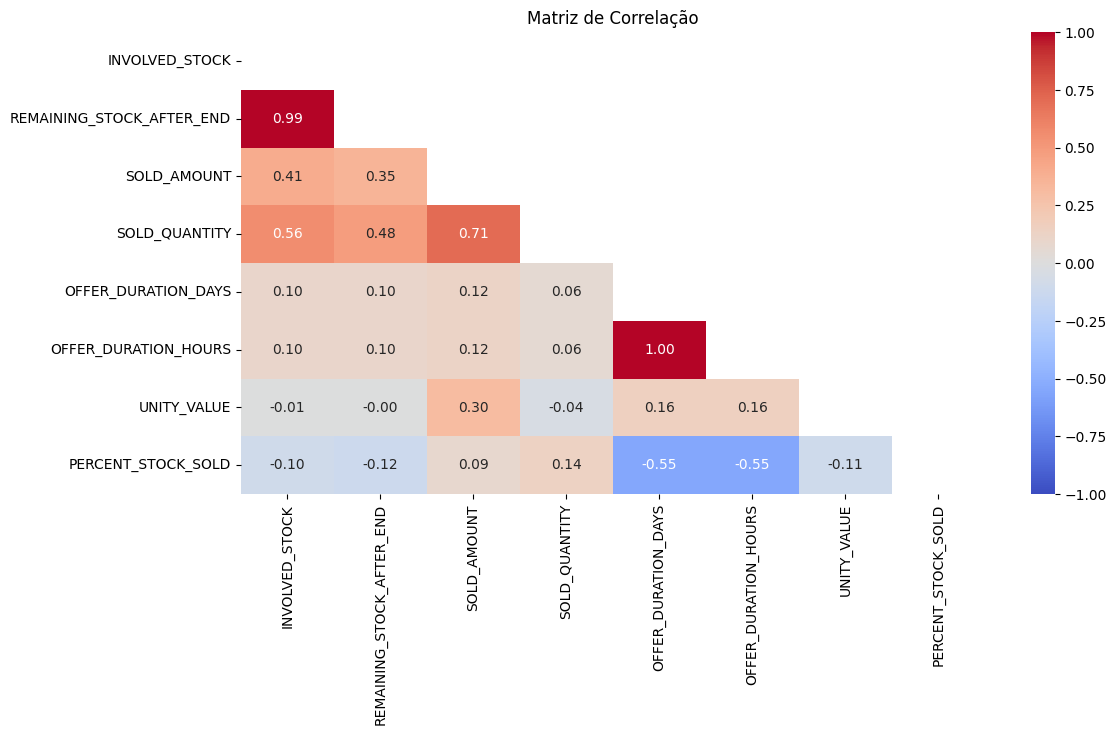

In [ ]:
plt.figure(figsize=(12, 6))
corr = df[numeric_values].corr()
mask = np.triu(np.ones_like(corr, dtype= bool ))
sns.heatmap(corr, mask =mask, annot = True, fmt = ".2f", cmap = "coolwarm", vmin =-1, vmax = 1)
plt.title('Matriz de Correlação de Pearson')
plt.show

**Principais Correlações Observadas**

- `SOLD_AMOUNT` vs. `REMAINING_STOCK_AFTER_END` (Correlação: 0.35):
    - Produtos mais caros tendem a ter mais sobras de estoque, ou seja, itens de maior valor possuem menor giro em ofertas relâmpago.

- `PERCENT_STOCK_SOLD` vs. `OFFER_DURATION_DAYS` (Correlação: -0.55):
    - Quanto maior o percentual de estoque vendido, menor a duração da oferta. Ofertas longas indicam baixo desempenho de venda.

In [457]:
# parâmetros
categ_values = ["DOM_DOMAIN_AGG1", "VERTICAL", "OFFER_WEEK_DAY" , "OFFER_START_HOUR"]
cols = 2
rows = int(np.ceil(len(categ_values) / cols))

subplot_titles = [f'Distribuição de {col}' for col in categ_values]

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=subplot_titles
)

# iteração
for i, col in enumerate(categ_values):
    row = i // cols + 1
    col_pos = i % cols + 1

    bar_graph = df.groupby(f"{col}").agg({
        "SOLD_QUANTITY": "sum",
        "SOLD_AMOUNT": "sum"
    }).reset_index().sort_values(by=f"{col}")


    fig.add_trace(
        go.Bar(
            x=bar_graph['SOLD_QUANTITY'],
            y=bar_graph[f'{col}'],
            orientation='h',
            name='Sold Quantity', 
            marker_color=CORES_GRAFICOS[0]
        ),
        row=row, col=col_pos
    )

    fig.add_trace(
        go.Bar(
            x=bar_graph['SOLD_AMOUNT'],
            y=bar_graph[f'{col}'],
            orientation='h',
            name='Sold Amount',   
            marker_color=CORES_GRAFICOS[4]
        ),
        row=row, col=col_pos
    )

# Layout
fig.update_layout(
    height=900,
    width=1200,
    title_text="Análise de Distribuição: Quantidade vs. Valor Vendido",
    template='plotly_white',
    barmode='group',  
    showlegend=True  
)

names = set()
fig.for_each_trace(
    lambda trace:
        trace.update(showlegend=False)
        if (trace.name in names) else names.add(trace.name))

fig.show()

/tmp/ipykernel_25287/1398501977.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
custom_bluescale = [[0, 'rgb(235, 243, 252)'], [1, CORES_GRAFICOS[0]]]

# Cria a tabela pivotada
pivot_data = df.pivot_table(
    values='SOLD_QUANTITY',   
    index='OFFER_START_HOUR',  
    columns='OFFER_WEEK_DAY',  
    aggfunc='sum',             
    fill_value=0          
)

# GRAFICO
fig = go.Figure(data=go.Heatmap(
    z=pivot_data.values,      
    x=pivot_data.columns,     
    y=pivot_data.index,       
    colorscale=custom_bluescale, 
    hoverongaps=False,
    colorbar=dict(title='Qtd. Vendida')
))

fig.add_shape(type="rect",
    x0=-0.5, y0=10, x1=6.5, y1=14,
    line=dict(color=CORES_GRAFICOS[4]),
)

fig.add_shape(type="rect",
    x0=-0.5, y0=18, x1=6.5, y1=20,
    line=dict(color=CORES_GRAFICOS[4]),
)

fig.add_annotation(
    x=1, 
    y=15,    
    text=f'Região de destaque das vendas', 
    showarrow=False,                                      
    align="center",
    arrowwidth=2,
    borderwidth=2,
    borderpad=4,
    opacity=0.8,
    bgcolor=CORES_GRAFICOS[4]
)

# layout
fig.update_layout(
    title='Quantidade Vendida por Dia da Semana e Horário',
    xaxis_title='Week Day',
    yaxis_title='Horário de Venda',
    yaxis=dict(autorange='reversed'),
    height=600,
    width=900
)

fig.show()

/tmp/ipykernel_25287/2902469922.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



**Principais Insights de Vendas**

- Período de vendas: As vendas se concentram no **início da semana útil (seg-qua)**, com picos no **horário de almoço (11h-13h)** e no **pós-expediente (19h)**, alinhados com a rotina do consumidor.
- Maior venda: A categoria **BEAUTY & HEALTH** apresenta as maiores vendas quantidade e volume, impulsionada principalmente por produtos de farmácia (PHARMACEUTICS).
- Melhor proporção: A categoria CE (Eletrônicos) lidera com o maior ticket médio, com produtos de alto valor agregado.